In [1]:
#install.packages("jsonlite")
#install.packages("ggmap")
#install.packages("geosphere")
#install.packages("dint")

In [1]:
library("jsonlite")
library("ggmap")
library("geosphere")
library("ggplot2")


Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.


In [2]:
infraction <- read.csv("C:/Users/Administrator/Desktop/R/Parking_Tags_Data_2018_1.csv" )
result <- fromJSON("https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/b66466c3-69c8-4825-9c8b-04b270069193/resource/059cde7d-21bc-4f24-a533-6c2c3fc33ef1/download/green-p-parking-2019.json")
GP<- data.frame(result)
TTCStop <- read.delim2("C:/Users/Administrator/Desktop/R/stops.txt", header = TRUE, sep = "," )

Warning message in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, :
"EOF within quoted string"

In [3]:
#Top 20 tickets by frequency
freq <- data.frame(table(infraction$location2 ))
colnames(freq)[colnames(freq) == 'Var1'] <- 'location2'
freq2 <- freq[order(-freq$Freq),][1:20,]
freq2

,location2,Freq
23780,20 EDWARD ST,968
27447,2200 LAKE SHORE BLVD W,963
21353,19 GRAND TRUNK CRES,747
25119,2075 BAYVIEW AVE,722
9246,1265 MILITARY TRL,708
14497,150 GERRARD ST W,540
33942,273 BLOOR ST W,525
14459,150 DAN LECKIE WAY,475
77350,LA PLANTE AVE,453
2774,103 THE QUEENSWAY,441


In [4]:
#Top 20 infraction type by frequency 
infra_code <- data.frame(table(infraction$infraction_code ))
colnames(infra_code)[colnames(infra_code) == 'Var1'] <- 'infraction_code'
infra_code_freq <- infra_code[order(-infra_code$Freq),][1:20,]
infra_code_freq

,infraction_code,Freq
3,3,69233
5,5,54177
25,29,52913
52,207,38712
2,2,20866
107,406,19092
9,9,17880
24,28,13413
8,8,12920
104,403,12800


In [5]:
#Top 20 infraction location by revenue
revenue <- aggregate(infraction$set_fine_amount, by=list(infraction$location2),FUN=sum,na.rm=TRUE )
colnames(revenue)[colnames(revenue) == 'x'] <- 'revenue'
colnames(revenue)[colnames(revenue) == 'Group.1'] <- 'location'
revenue2 <- revenue[order(-revenue$revenue),][1:20,]
revenue2

,location,revenue
25568,21 HILLCREST AVE,76790
46947,40 ORCHARD VIEW BLVD,65030
47878,410 COLLEGE ST,55550
14459,150 DAN LECKIE WAY,54500
19797,18 GRENVILLE ST,48080
23780,20 EDWARD ST,45100
16510,160 CHALKFARM DR,32610
33942,273 BLOOR ST W,31000
21353,19 GRAND TRUNK CRES,29980
27447,2200 LAKE SHORE BLVD W,29750


In [6]:
#Top 20 infraction type by revenue
revenue_type <- aggregate(infraction$set_fine_amount, by=list(infraction$infraction_code),FUN=sum,na.rm=TRUE )
colnames(revenue_type)[colnames(revenue_type) == 'x'] <- 'revenue'
colnames(revenue_type)[colnames(revenue_type) == 'Group.1'] <- 'infraction_code'
revenue_infraction_code <- revenue_type[order(-revenue_type$revenue),][1:20,]
revenue_infraction_code

,infraction_code,revenue
5,5,2708650
3,3,2076960
104,403,1920000
25,29,1587390
52,207,1161360
9,9,1072800
8,8,775200
107,406,763680
79,347,713750
51,192,677850


In [7]:
#total revenue
sum(infraction$set_fine_amount, na.rm = TRUE)


[1] 18008570

In [174]:
# Distance to closest parking lots for top 20 infractions

In [8]:
register_google(key = "XXXXXXXXXXXXXX")

In [9]:
GPlist <- GP$carparks.address
GPmasg <- paste( GPlist, ",Toronto,Ontario,Canada")
GPlistlocation <- geocode(GPmasg)
GPlist2<-data.frame(GPlist,GPlistlocation)


Source : https://maps.googleapis.com/maps/api/geocode/json?address=20+Charles+Street+East+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=13+Isabella+Street+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=15+Wellesley+Street+East+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=21+Pleasant+Blvd.+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=30+Alvin+Avenue+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=20+Delisle+Avenue+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=716+Pape+Avenue+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=351+Keele+Street+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/js

In [10]:
infralist <- paste( freq2$location2, ",Toronto,Ontario,Canada")
infralocation <- geocode(infralist,messaging = FALSE)
toplist<-data.frame(freq2$location2,infralocation)
colnames(toplist)[colnames(toplist) == 'freq2.location2'] <- 'location'


Source : https://maps.googleapis.com/maps/api/geocode/json?address=20+EDWARD+ST+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=2200+LAKE+SHORE+BLVD+W+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=19+GRAND+TRUNK+CRES+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=2075+BAYVIEW+AVE+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=1265+MILITARY+TRL+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=150+GERRARD+ST+W+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=273+BLOOR+ST+W+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address=150+DAN+LECKIE+WAY+,Toronto,Ontario,Canada&key=xxx
Source : https://maps.googleapis.com/maps/api/geocode/json?address

In [13]:
#Closest disance to greenparking
n <- nrow(infralocation)
m <- nrow(GPlistlocation)

closest_loc_list <- vector(mode = "list", length = 20)
closest_distance_list <- vector(mode = "list", length = 20)
#closest_loc <- NULL
#closest_distance <- NULL
for (i in 1:n) {
    closest_loc <- NULL
    closest_distance <- NULL
    current_distance <- NULL
    for (j in 1:m) {  
       # print(j)
        current_distance <- distm(infralocation[i,],GPlistlocation[j,] , fun = distHaversine)
        #print(current_distance)
        #print(GPlist[j]  )
        #print(closest_distance)
        #print(closest_loc)
        #print(i)
        if (is.null(closest_loc)){  
           # print(j)
            closest_loc <- GPlist[j]          
            closest_distance <- current_distance  
        }
        else if (current_distance < closest_distance) {
            closest_loc <- GPlist[j]
            closest_distance <- current_distance
        }
        else
            next
    }
    closest_loc_list[i] <- closest_loc
    closest_distance_list[i] <- closest_distance
    #print(closest_loc )
    #print(closest_distance )
}



cbind(infralist,closest_loc_list,closest_distance_list)

infralist,closest_loc_list,closest_distance_list
"20 EDWARD ST ,Toronto,Ontario,Canada",20 Dundas Square,147.0291
"2200 LAKE SHORE BLVD W ,Toronto,Ontario,Canada",2195 Lake shore Blvd West (Parks),554.6226
"19 GRAND TRUNK CRES ,Toronto,Ontario,Canada",40 York Street,445.8081
"2075 BAYVIEW AVE ,Toronto,Ontario,Canada",2170 Bayview avenue,554.1368
"1265 MILITARY TRL ,Toronto,Ontario,Canada",284 Milner Avenue,4084.3
"150 GERRARD ST W ,Toronto,Ontario,Canada",130 Elizabeth Street - Toronto Coach Terminal,345.56
"273 BLOOR ST W ,Toronto,Ontario,Canada",9 Bedford Road,156.9802
"150 DAN LECKIE WAY ,Toronto,Ontario,Canada",10 Portland Street,261.1928
"LA PLANTE AVE ,Toronto,Ontario,Canada",130 Elizabeth Street - Toronto Coach Terminal,395.2514
"103 THE QUEENSWAY ,Toronto,Ontario,Canada",2001 Lake Shore Blvd. West (Parks),304.6245


In [ ]:
# Distance to closest TTC stop for top 20 infractions

In [ ]:
#Data volumn is huge
TTClist <- paste( TTCStop$stop_name, ",Toronto,Ontario,Canada")
TTClistlocation <- geocode(TTClist)
TTClist2<-data.frame(TTClist,TTClistlocation, messaging = FALSE)

In [ ]:
#Closest disance to TTC
closest_loc <- NULL
closest_distance <- NULL
n <- nrow(infralocation)
m <- nrow(TTClistlocation)


closest_loc_list <- vector(mode = "list", length = 20)
closest_distance_list <- vector(mode = "list", length = 20)
#closest_loc <- NULL
#closest_distance <- NULL
for (i in 1:n) {
    closest_loc <- NULL
    closest_distance <- NULL
    current_distance <- NULL
    for (j in 1:m) {  
       # print(j)
        current_distance <- distm(infralocation[i,],TTClistlocation[j,] , fun = distHaversine)
        print(current_distance)
        print(TTClist[j]  )
        print(closest_distance)
        print(closest_loc)
        print(i)
        if (is.null(closest_loc)){  
           # print(j)
            closest_loc <- TTClist[j]          
            closest_distance <- current_distance  
        }
        else if (current_distance < closest_distance) {
            closest_loc <- TTClist[j]
            closest_distance <- current_distance
        }
        else
            next
    }
    closest_loc_list[i] <- closest_loc
    closest_distance_list[i] <- closest_distance
    #print(closest_loc )
    #print(closest_distance )
}


cbind(infralist,closest_loc_list,closest_distance_list)


In [15]:
#Impact of day of week/ month&season of year in all infractions

In [18]:
week_day <-NULL
w <- as.character(infraction$date_of_infraction)
n <- NROW(infraction$date_of_infraction)
for (i in 1:n) {
    week_day[i] <- weekdays(as.Date(w[i],"%Y%m%d"))  
         
}

infraction_by_dayofweek <- data.frame(table(week_day))

infraction_by_dayofweek

week_day,Freq
iSonto,38167
uLwesibili,57845
uLwesihlanu,58007
uLwesine,59341
uLwesithathu,55832
uMgqibelo,49710
uMsombuluko,46419


In [109]:
month <-NULL
w <- infraction$date_of_infraction
n <- NROW(infraction$date_of_infraction)
for (i in 1:n) {
    month[i] <- substr(w[i],5,6)  
         
}

infraction_by_monthofyear <- data.frame(table(month))

infraction_by_monthofyear

month,Freq
01,154625
02,146038
03,64658


In [ ]:
#distribution by  year,month,fines

In [172]:
chart_month <- function(df){
        chart1<-ggplot(df, aes(x = month , y = Freq))+geom_bar(fill = "#0073C2FF", stat = "identity",size = 3)
    return(chart1)}


chart_year <- function(df){
        chart1<-ggplot(df, aes(x = year , y = Freq))+geom_bar(fill = "#0073C2FF", stat = "identity",size = 3)
    return(chart1)}

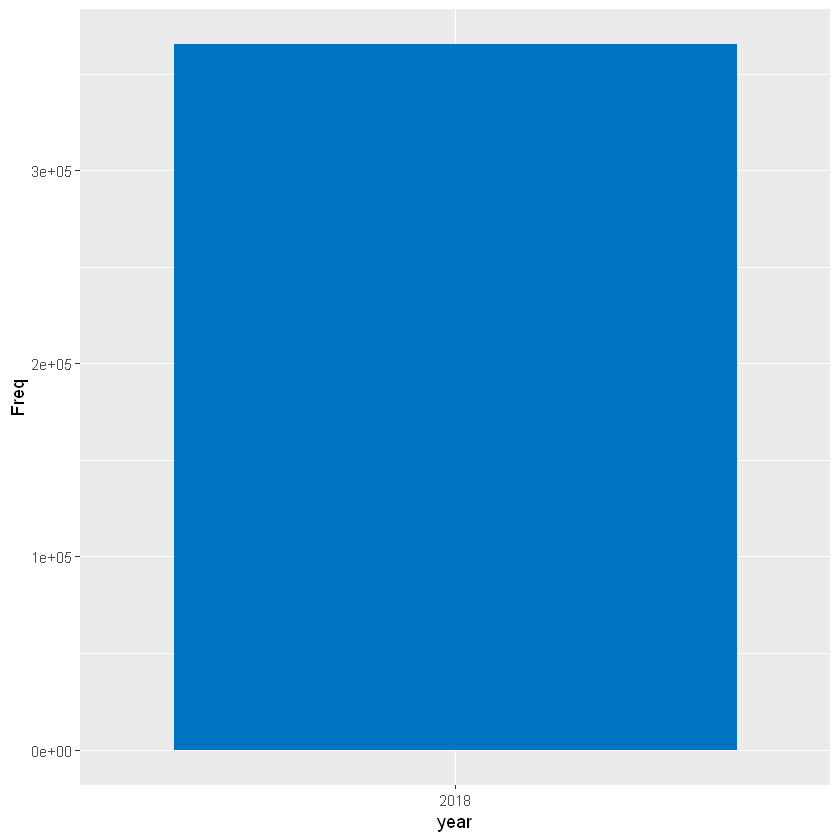

In [160]:
year <- substr(infraction$date_of_infraction, 1, 4)
yeardis <- data.frame(table(year ))
chart_year(yeardis)

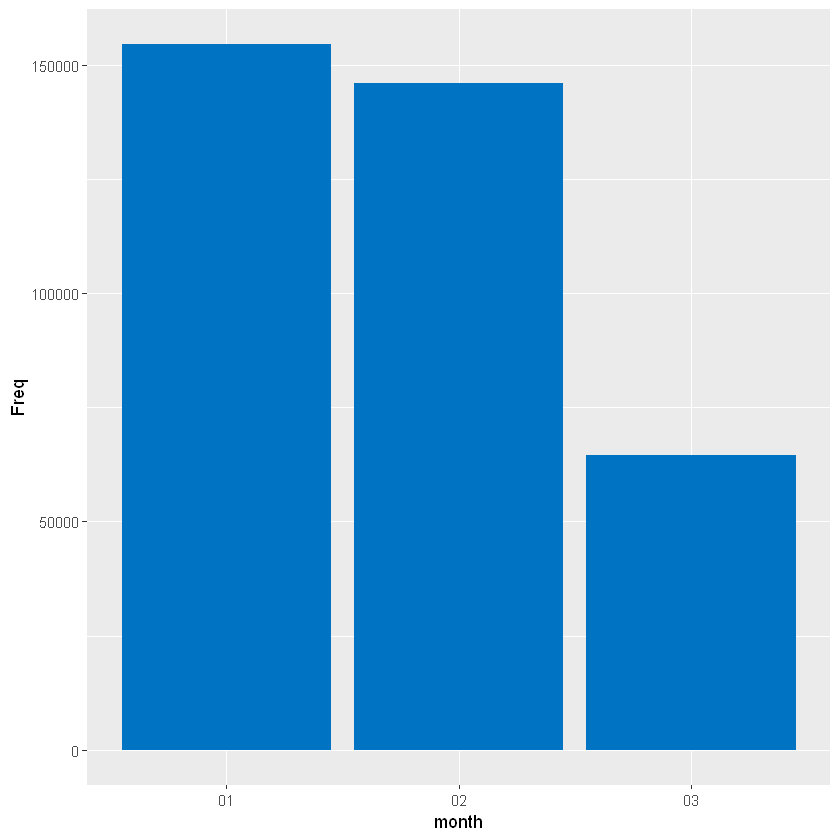

In [159]:
month <- substr(infraction$date_of_infraction, 5, 6)
monthdis <- data.frame(table(month ))
chart_month(monthdis)

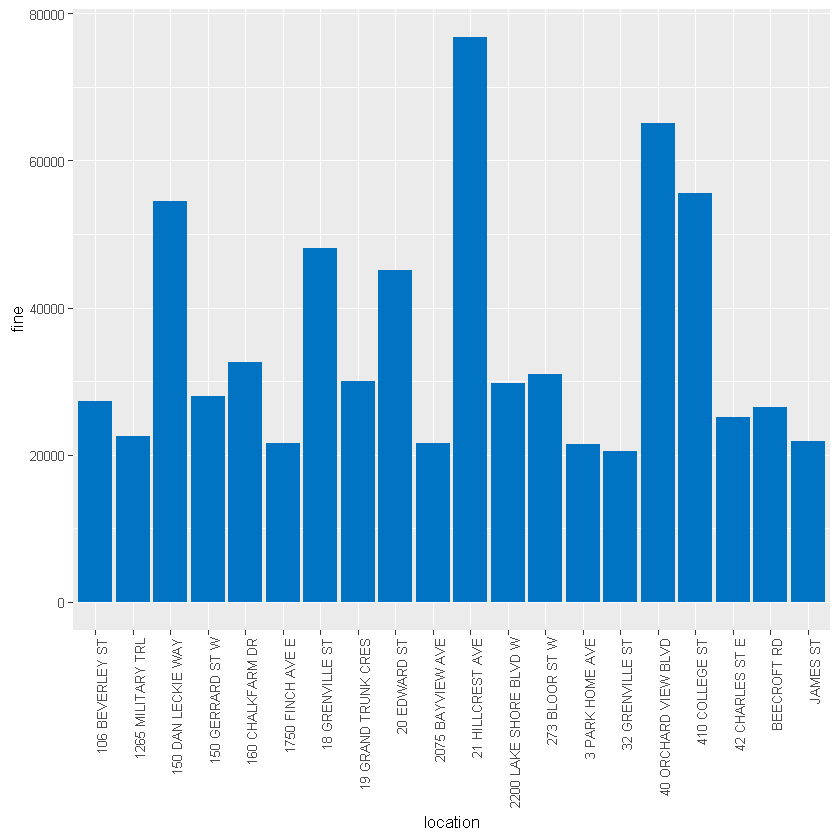

In [173]:

colnames(revenue2)[colnames(revenue2) == 'revenue'] <- 'fine'
ggplot(revenue2, aes(x = location, y = fine))+geom_bar(fill = "#0073C2FF", stat = "identity",size = 1)+theme(text = element_text(size=10),
        axis.text.x = element_text(angle=90, hjust=1)) 

In [ ]:
#write.csv(result2)